In [99]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!pip install plotly_express==0.4.1
import plotly.express as px
import plotly.graph_objects as go #for calling graph objects from plotly library

In [100]:
confirmed_df=pd.read_csv('/content/total-confirmed-cases-of-covid-19-per-million-people.csv')
confirmed_df.head()

#rename column name
confirmed_df.rename(columns={'Total confirmed cases of COVID-19 per million people (cases per million)':'Confirmed'},inplace=True) 

#load the clean complete dataset for visualization and exploratory analysis
combined_df=pd.read_csv('covid_19_clean_complete.csv')
combined_df.head()

confirmed_df.describe() #descriptives

# no of rows & columns
confirmed_df.shape

#data types
confirmed_df.dtypes

confirmed_df.isnull().any() # looking for null values , only country code has null values

#count of null values
confirmed_df.isna().sum()

Entity         0
Code         618
Date           0
Confirmed      0
dtype: int64

Load Deaths Dataset

In [101]:
death_df=pd.read_csv('total-covid-deaths-per-million.csv')

#rename column name
death_df.rename(columns={'Total confirmed deaths due to COVID-19 per million people (deaths per million)':'Deaths'},inplace=True) 

death_df.head()

#convert the date column to datetime before merging
confirmed_df['Date']= pd.to_datetime(confirmed_df['Date'])
death_df['Date']=pd.to_datetime(death_df['Date']) 
confirmed_df.dtypes

Entity               object
Code                 object
Date         datetime64[ns]
Confirmed           float64
dtype: object

### Join the death and confirmed datasets

These datasets are normalized for confirmed and death cases per million of the population. We will use this standardized dataset as we will add on several other parameters and variables later on

In [102]:
#join the two datasets death_df and confirmed_df
confirmed_total_date = confirmed_df.groupby(['Date']).agg({'Confirmed':['sum']})
death_total_date = death_df.groupby(['Date']).agg({'Deaths':['sum']})
total_date = confirmed_total_date.join(death_total_date)


confirmed_country=confirmed_df.groupby(['Entity']).agg({'Confirmed':['sum']})
death_country=death_df.groupby(['Entity']).agg({'Deaths':['sum']})
total_country=confirmed_country.join(death_country)
total_country.head()

,Confirmed,Deaths
,sum,sum
Entity,,
Afghanistan,113.696086,2.363317
Africa,100.546912,3.666274
Albania,2000.833970,93.821669
Algeria,392.784272,35.757416
Andorra,101559.567721,2679.091439


##Visualizations

Text(0.5, 0, 'Date')

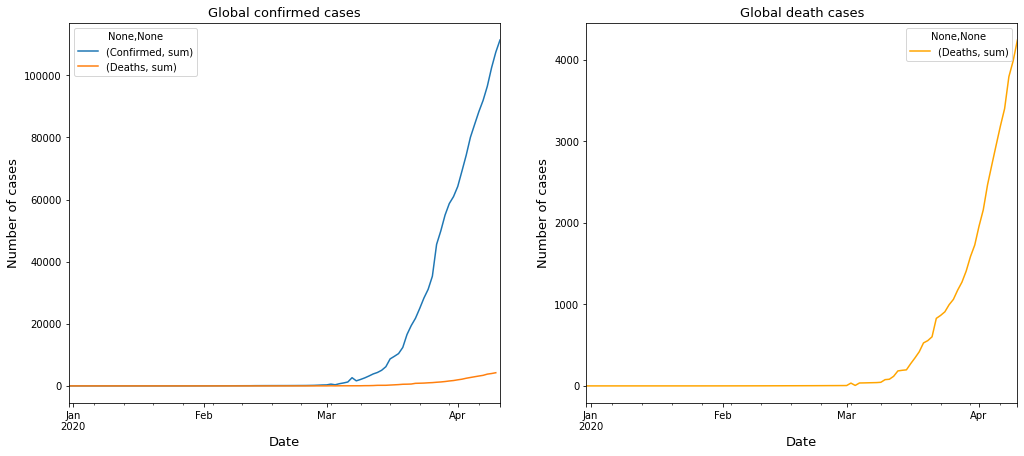

In [103]:
#Display confirmed vs death on the combined dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
death_total_date.plot(ax=ax2, color='orange')
ax2.set_title("Global death cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

In [104]:
x=combined_df['Date']
y=combined_df['Confirmed']
z=combined_df['Deaths']
w=combined_df['Recovered']


#call Bar charts and assign to fig_t. Add traces to the same figure
fig_t = go.Figure(go.Bar(x=x, y=y, name='Confirmed', marker_color='lightblue', opacity=.8))
fig_t.add_trace(go.Bar(x=x, y=z, name='Deaths', marker_color='red', opacity=0.9))
fig_t.add_trace(go.Bar(x=x, y=w, name='Recovered', marker_color='green', opacity=0.5))

#here we define layout of the chart
fig_t.update_layout(barmode='overlay', xaxis={'categoryorder':'total ascending'},xaxis_type='category',
                  title={
        'text': 'Cummulative COVID-19 world trend',
        'y':0.79,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'},)
fig_t.update_xaxes(title= '----->Timeline' ,showline=True)
fig_t.update_yaxes(title= '----->Number of cases', showline=True)
fig_t.show()

In [105]:
#call Line charts and assign to fig_inc. Add traces to the same figure
fig_inc = go.Figure(go.Line(x=combined_df['Date'], y=combined_df['Confirmed'],name='Confirmed', mode='lines+markers',marker=dict(size=10,color='lightblue')))
fig_inc.add_trace(go.Line(x=combined_df['Date'], y=combined_df['Recovered'],name='Recovered', mode='lines+markers',marker=dict(size=10,color='lightseagreen')))
fig_inc.add_trace(go.Line(x=combined_df['Date'], y=combined_df['Deaths'], name='Deaths', mode='lines+markers',marker=dict(size=10,color='red')))
#here we define layout of the chart
fig_inc.update_layout(xaxis_showgrid=True, yaxis_showgrid=True, plot_bgcolor='whitesmoke', 
        title={
        'text': 'Incremental COVID-19 world trend',
        'y':0.75,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},xaxis_type='category')
fig_inc.update_xaxes(title= '------>Timeline' ,showline=False)
fig_inc.update_yaxes(title= '------>Number of incremental cases', showline=False)

fig_inc.show()

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




###Trends of the world without China Data

Text(0.5, 0, 'Date')

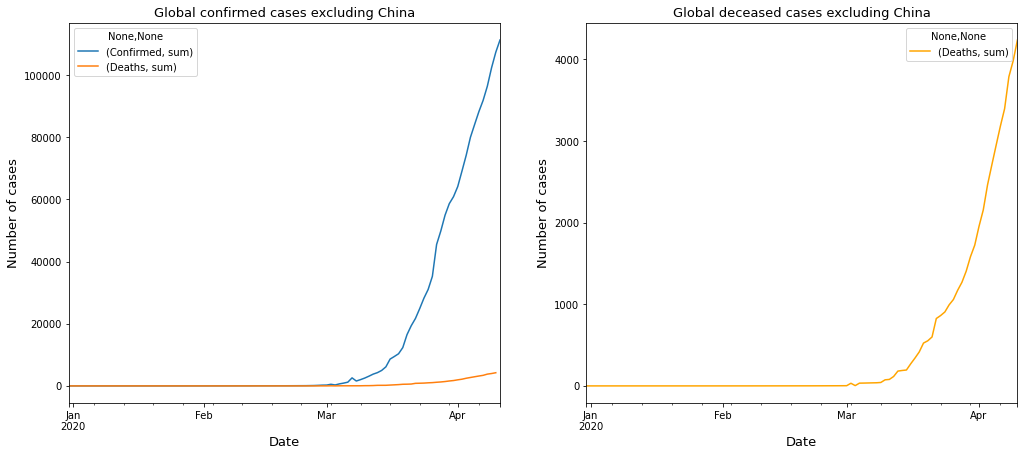

In [106]:
confirmed_noChina = confirmed_df[confirmed_df['Entity']!='China'].groupby(['Date']).agg({'Confirmed':['sum']})
death_noChina = death_df[death_df['Entity']!='China'].groupby(['Date']).agg({'Deaths':['sum']})
total_noChina = confirmed_noChina.join(death_noChina)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_noChina.plot(ax=ax1)
ax1.set_title("Global confirmed cases excluding China", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
death_noChina.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases excluding China", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

###Covid 19 situation in China

Text(0.5, 0, 'Date')

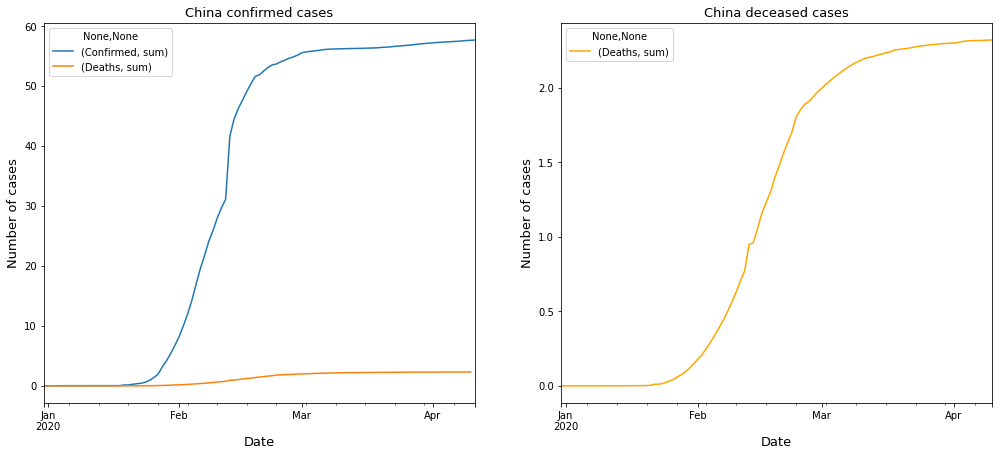

In [107]:
confirmed_China = confirmed_df[confirmed_df['Entity']=='China'].groupby(['Date']).agg({'Confirmed':['sum']})
death_China = death_df[death_df['Entity']=='China'].groupby(['Date']).agg({'Deaths':['sum']})
total_China = confirmed_China.join(death_China)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_China.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
death_China.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

In [108]:
#Add population data 
population=pd.read_csv('/content/population_by_country_2020.csv')
population.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1438207241,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1377233523,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,330610570,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,272931713,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,219992900,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


##Join the population dataset with the COvid 19 dataset

In [109]:
population=population[['Country (or dependency)','Med. Age','Urban Pop %','Density (P/Km²)','Land Area (Km²)','World Share']]
population.rename(columns={'Med. Age':'med_age','Urban Pop %':'urban_pop','Density (P/Km²)':'density','Land Area (Km²)':'land_area','World Share':'world_share'},inplace=True) 
population.head()

population['med_age'].fillna(0, inplace=True)
population.iloc[201,:]

#combining the confirmed and death cases 
join_df=confirmed_df.merge(death_df,left_on=['Entity','Date','Code'],right_on=['Entity','Date','Code'],how='left')
join_df.head()

#now combine world population with above dataset
all_data = join_df.merge(population, left_on='Entity', right_on='Country (or dependency)', how='left')
all_data.head()

#drop extra column
all_data=all_data.drop(['Country (or dependency)'], axis=1)

#join the stringent index
stringent=pd.read_csv('/content/(Govt_Resp)OxCGRT_Download_290420_184525_Full.csv')

stringent['Date']=pd.to_datetime(stringent['Date']) 

stringent.rename(columns={'CountryName':'Entity'},inplace=True) 
stringent.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (28,34,45) have mixed types.Specify dtype option on import or set low_memory=False.



,Entity,CountryCode,Date,C1_School closing,C1_Flag,C1_Notes,C2_Workplace closing,C2_Flag,C2_Notes,C3_Cancel public events,C3_Flag,C3_Notes,C4_Restrictions on gatherings,C4_Flag,C4_Notes,C5_Close public transport,C5_Flag,C5_Notes,C6_Stay at home requirements,C6_Flag,C6_Notes,C7_Restrictions on internal movement,C7_Flag,C7_Notes,C8_International travel controls,C8_Notes,E1_Income support,E1_Flag,E1_Notes,E2_Debt/contract relief,E2_Notes,E3_Fiscal measures,E3_Notes,E4_International support,E4_Notes,H1_Public information campaigns,H1_Flag,H1_Notes,H2_Testing policy,H2_Notes,H3_Contact tracing,H3_Notes,H4_Emergency investment in healthcare,H4_Notes,H5_Investment in vaccines,H5_Notes,M1_Wildcard,M1_Notes,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
0,Aruba,ABW,1970-01-01 00:00:00.020200101,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,1970-01-01 00:00:00.020200101,0.0,NaN,https://en.unesco.org/themes/education-emergen...,0.0,NaN,"Form January 1 to March 25th, there were no cl...",0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,"Prior to March 25, 2020, there were no restric...",NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,Angola,AGO,1970-01-01 00:00:00.020200101,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,Albania,ALB,1970-01-01 00:00:00.020200101,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,Andorra,AND,1970-01-01 00:00:00.020200101,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


##Combining Dataset with stringency Index

In [110]:
final_df=all_data.merge(stringent,left_on=['Entity','Date'],right_on=['Entity','Date'],how='left')
final_df.head()

final_df.shape

#null values
final_df.isna().sum()

#Peng

# data = pd.read_csv('final_df.csv')
# data.head()
# data['covid_inc'] = np.where(data['Confirmed']>0,1,0)
# data.to_csv('MLfinal.csv')
# data['no_cumulative'] = data.groupby(['Entity'])['covid_inc'].apply(lambda x: x.cumsum())

# data = data [data['Confirmed'] !=0]
# data.to_csv('ML_df.csv')

Entity                                 0
Code                                 618
Date                                   0
Confirmed                              0
Deaths                               210
                                   ...  
ConfirmedDeaths                    10738
StringencyIndex                    10738
StringencyIndexForDisplay          10738
LegacyStringencyIndex              10738
LegacyStringencyIndexForDisplay    10738
Length: 62, dtype: int64

##Load ML_DF and new cases daily file

In [111]:
new_case=pd.read_csv('/content/new-covid-cases-per-million.csv')

new_case=new_case.drop(['Code'], axis=1)

new_case.rename(columns={'Daily new confirmed cases of COVID-19 per million people (cases)':'Daily'},inplace=True) 
new_case.head()

new_case['Date']=pd.to_datetime(new_case['Date']) 
new_case.dtypes

Entity            object
Date      datetime64[ns]
Daily            float64
dtype: object

In [0]:
#Group by the dataset by dates and population number of weeks 
#read ML_df dataset

ML_df=pd.read_csv('/content/ML_df.csv')
ML_df=ML_df.drop(['Unnamed: 0','Unnamed: 0.1','Code'], axis=1)

ML_df['Date']=pd.to_datetime(ML_df['Date'])

In [113]:
#Merge ML_df with new cases per day column 
ML_df=ML_df.merge(new_case,left_on=['Entity','Date'],right_on=['Entity','Date'],how='left')

#treat missing values
ML_df['Daily'].fillna(0, inplace=True)

ML_df.head()

ML_df.isnull().sum() #fix missing values

Entity                                      0
Date                                        0
Confirmed                                   0
Deaths                                    210
med_age                                  1329
urban_pop                                 964
density                                   964
land_area                                 964
world_share                               964
H3_Contact tracing                       2030
E4_International support                 2030
H4_Emergency investment in healthcare    2030
H5_Investment in vaccines                2030
H2_Testing policy                        2030
H3_Contact tracing.1                     2030
E1_Income support                        2030
StringencyIndex                          2030
covid_inc                                   0
no_cumulative                               0
Week NUM                                    0
Daily                                       0
dtype: int64

In [0]:
#fill missing values
ML_df['med_age'].fillna(0,inplace=True)
#ML_df['urban_pop'].fillna(0,inplace=True)
ML_df['density'].fillna(0,inplace=True)
ML_df['land_area'].fillna(0,inplace=True)

 #selects countries and maximum value per week 

#selects countries and maximum value per week 

# ML_df['land_area'].fillna(0,inplace=True)

# ML_df['urban_pop'] = ML_df.urban_pop.astype(float)
# ML_df['world_share'] = ML_df.world_share.astype(float)

In [115]:
grouped = ML_df.groupby(['Entity', 'Week NUM']).agg({'Confirmed':'max','Daily':'sum','Deaths':'max','med_age':'mean',
                                                     'density':'mean','H3_Contact tracing':'max',
                                                     'E4_International support':'mean',
                                                     'H4_Emergency investment in healthcare':'mean',
                                                         'H5_Investment in vaccines':'mean','H2_Testing policy':'max',
                                                         'E1_Income support':'max','no_cumulative':'count'})
 #selects countries and maximum value per week 

grouped.head(5)

weekly_df=grouped.groupby('Entity').agg({'Confirmed':'max','Daily':'mean','Deaths':'max','med_age':'mean','density':'mean','H3_Contact tracing':'max',
                                                         'E4_International support':'mean','H4_Emergency investment in healthcare':'mean',
                                                         'H5_Investment in vaccines':'mean','H2_Testing policy':'max',
                                                         'E1_Income support':'max','no_cumulative':'count'})
weekly_df.head()

,Confirmed,Daily,Deaths,med_age,density,H3_Contact tracing,E4_International support,H4_Emergency investment in healthcare,H5_Investment in vaccines,H2_Testing policy,E1_Income support,no_cumulative
Entity,,,,,,,,,,,,
Afghanistan,13.383565,2.230667,0.385323,18.0,60.0,1.0,0.0,4.548146e+06,0.0,1.0,0.0,6
Africa,9.661359,1.073667,0.469939,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9
Albania,144.554868,28.910400,7.992216,36.0,105.0,1.0,0.0,7.142857e+05,0.0,1.0,0.0,5
Algeria,40.158680,6.693500,5.359052,29.0,18.0,0.0,0.0,2.380952e+06,0.0,1.0,0.0,6
Andorra,7778.424901,1555.684400,323.561768,0.0,164.0,1.0,0.0,7.170053e+04,0.0,1.0,0.0,5


In [0]:
#Cleaning country names 

country_list=['Asia','Africa','Europe','World','Oceania','South America','North America']

clean_grouped=grouped.drop(index=country_list)

#fix the null values
clean_grouped.isnull().sum()

clean_grouped['Deaths'].fillna(0,inplace=True)
clean_grouped['H3_Contact tracing'].fillna(0,inplace=True)
clean_grouped['E4_International support'].fillna(0,inplace=True)
clean_grouped['H4_Emergency investment in healthcare'].fillna(0,inplace=True)
clean_grouped['H5_Investment in vaccines'].fillna(0,inplace=True)
clean_grouped['H2_Testing policy'].fillna(0,inplace=True)
clean_grouped['E1_Income support'].fillna(0,inplace=True)

In [0]:
#create weekly_df file

weekly_df=clean_grouped.groupby('Entity').agg({'Confirmed':'max','Daily':'mean','Deaths':'max','med_age':'mean','density':'mean','H3_Contact tracing':'max',
                                                         'E4_International support':'mean','H4_Emergency investment in healthcare':'mean',
                                                         'H5_Investment in vaccines':'mean','H2_Testing policy':'max',
                                                         'E1_Income support':'max','no_cumulative':'count'})
weekly_df.head()

weekly_df.isnull().sum()

weekly_df=weekly_df.reset_index()

#write as csv
weekly_df.to_csv('weekly_df.csv')

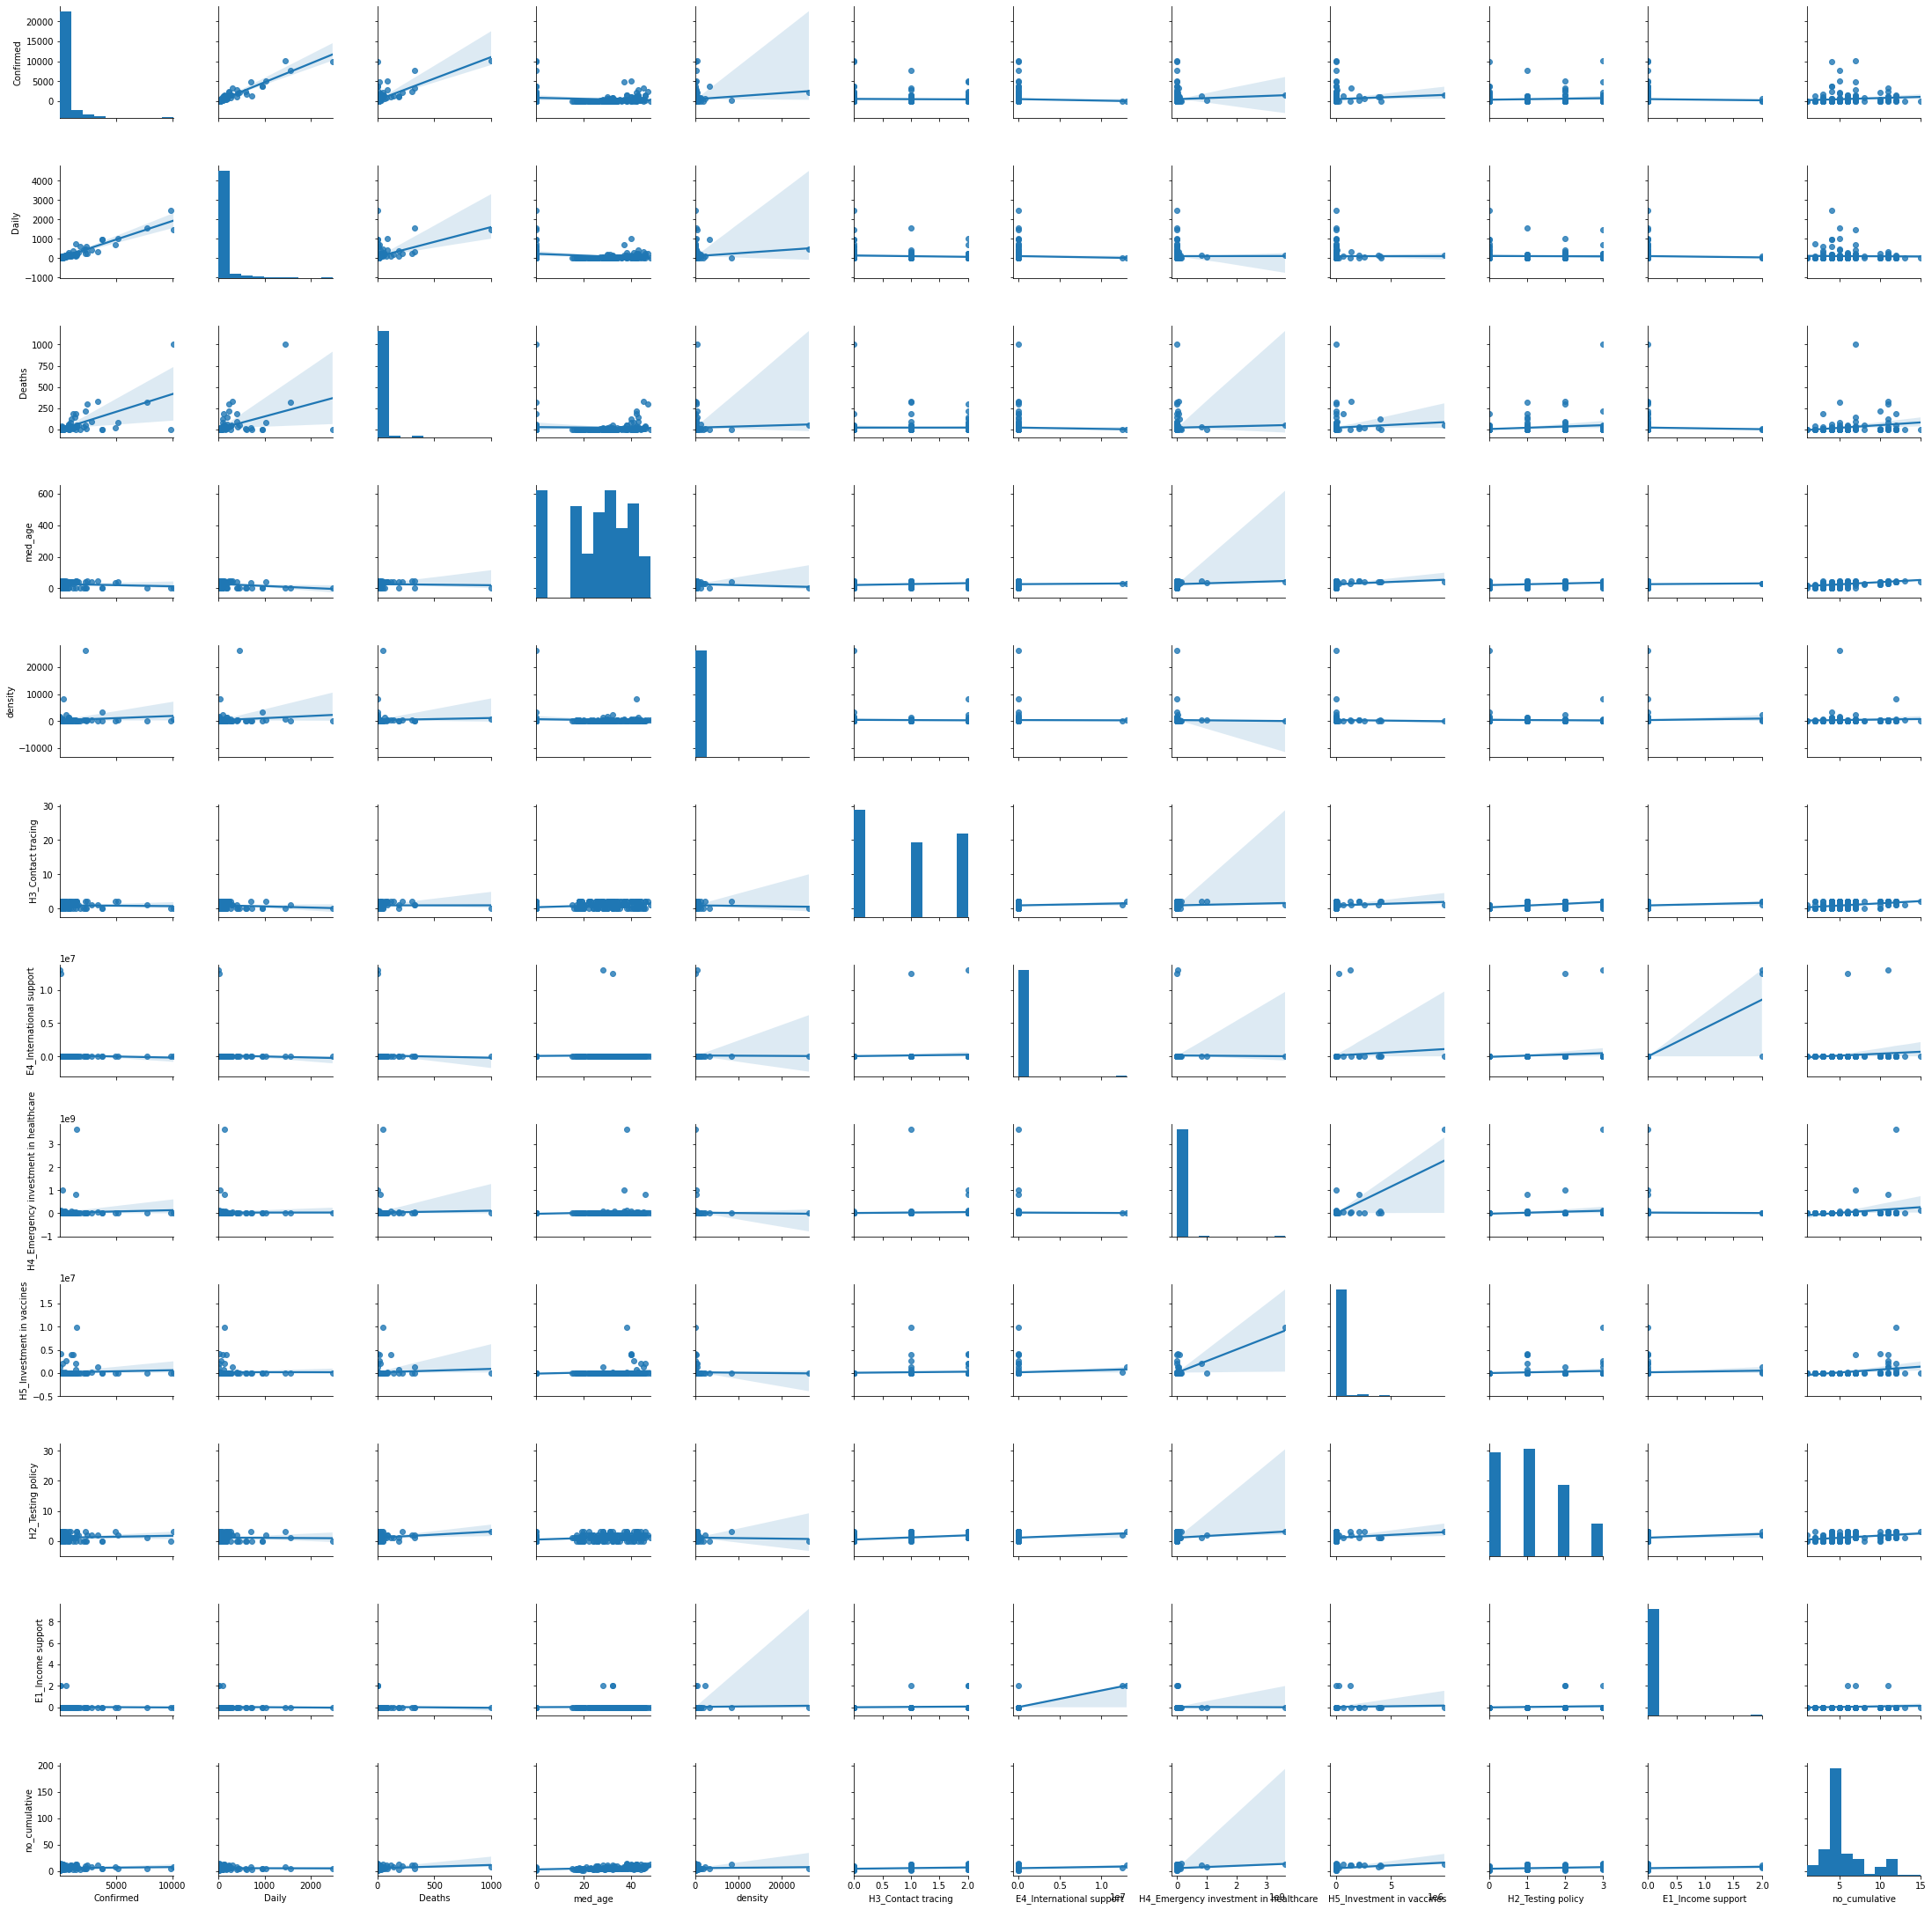

In [118]:
#pairplot to see correlations 
sns.pairplot(weekly_df, kind="reg")

## Split the dataset into Testing and Training

In [119]:
#Create Dummy Variables 
data_dummies = pd.get_dummies(weekly_df, columns=['H3_Contact tracing', 'H2_Testing policy', 'E1_Income support'],drop_first=True)
data_dummies.head()

,Entity,Confirmed,Daily,Deaths,med_age,density,E4_International support,H4_Emergency investment in healthcare,H5_Investment in vaccines,no_cumulative,H3_Contact tracing_1.0,H3_Contact tracing_2.0,H2_Testing policy_1.0,H2_Testing policy_2.0,H2_Testing policy_3.0,E1_Income support_2.0
0,Afghanistan,13.383565,2.230667,0.385323,18.0,60.0,0.0,4.548146e+06,0.0,6,1,0,1,0,0,0
1,Albania,144.554868,28.910400,7.992216,36.0,105.0,0.0,7.142857e+05,0.0,5,1,0,1,0,0,0
2,Algeria,40.158680,6.693500,5.359052,29.0,18.0,0.0,2.380952e+06,0.0,6,0,0,1,0,0,0
3,Andorra,7778.424901,1555.684400,323.561768,0.0,164.0,0.0,7.170053e+04,0.0,5,1,0,1,0,0,0
4,Angola,0.578100,0.192333,0.060853,17.0,26.0,0.0,1.904762e+06,0.0,3,0,0,0,1,0,0


In [0]:
#Test train split
from sklearn.model_selection import train_test_split
#y=data_dummies[['Daily']]
#X=data_dummies.drop(['Entity','Daily','no_cumulative','Confirmed','Deaths'],axis=1)

In [0]:
X = data_dummies[['med_age', 'density', 'E4_International support', 'H4_Emergency investment in healthcare', 'H5_Investment in vaccines', 'H3_Contact tracing_1.0', 'H3_Contact tracing_2.0', 'H2_Testing policy_1.0', 'H2_Testing policy_2.0', 'H2_Testing policy_3.0','E1_Income support_2.0']].values
y = data_dummies['Daily'].values

In [0]:
x_train, x_val, y_train, y_val = train_test_split(X, y,
                                                  test_size = .3,
                                                  random_state=12)

##Linear Regression

In [123]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#linear regression for sales

mod = sm.OLS(y_train,x_train)

res = mod.fit()

print(res.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.080
Model:                            OLS   Adj. R-squared (uncentered):              0.010
Method:                 Least Squares   F-statistic:                              1.144
Date:                Mon, 11 May 2020   Prob (F-statistic):                       0.335
Time:                        00:20:35   Log-Likelihood:                         -1015.3
No. Observations:                 142   AIC:                                      2051.
Df Residuals:                     132   BIC:                                      2080.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 

In [125]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train)
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
y_pred = regressor.predict(x_val)


#Print coefficients 
df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})

#Error 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

242.77121599848513
[-5.78522576e+00  1.14312063e-02 -4.71445023e-06 -7.13922710e-09
  1.11162826e-05 -2.14477787e+01 -3.09380991e+01  1.68938041e+01
  3.74071676e+01  7.77053288e+01 -4.01705254e-13]
Mean Absolute Error: 118.63775030752511
Mean Squared Error: 29856.855510969363
Root Mean Squared Error: 172.79136410992697


In [0]:
df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df1 = df.head(25)

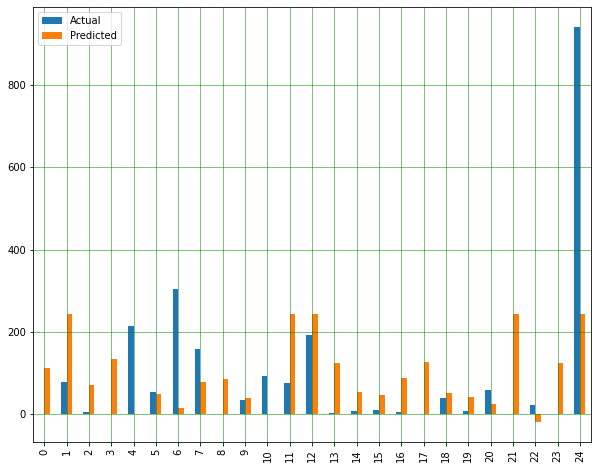

In [127]:
#Actual Vs predicted is way off - which shows it isn't the linear model
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

##Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict

In [0]:
# Perform Grid-Search
gsc = GridSearchCV(estimator=RandomForestRegressor(),param_grid={'max_depth': range(3,7),'n_estimators': (10, 50, 100, 1000),},
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
    
grid_result = gsc.fit(x_train, y_train)
best_params = grid_result.best_params_
    
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
# Perform K-Fold CV
scores = cross_val_score(rfr, x_train, y_train, cv=10, scoring='neg_mean_absolute_error')

In [130]:
print(scores)

[-119.3995191   -88.73229098 -115.66209878 -180.93634112 -136.77572343
  -64.64719672  -42.72672354 -259.38663833 -108.28856805 -276.18680731]


In [131]:
predictions = cross_val_predict(rfr, x_val, y_val, cv=10)
print(predictions)

[ 14.70111949  33.53460437  14.70111949  70.57879105  64.10323862
  36.59909676  82.78457631 251.9128442   20.57690128  27.5632599
 192.50528299  44.72225139 339.99451282  26.13857641  26.13857641
  26.13857641  26.13857641  26.13857641 156.33089638 160.87177749
  34.35403139  49.79845265 123.50952038  20.45579258  44.71700731
  27.51211093  95.18010132  27.51211093  27.51211093  22.90356241
  50.7366531   21.99255235  21.99255235  21.99255235  21.99255235
  21.99255235  41.03242154  71.93485812 319.00596099  45.98007432
  46.42841626  22.36289718  22.36289718  22.00010021 500.00014567
  22.00010021  22.00010021  22.00010021 231.43434349  18.544019
 361.70598975 334.46243649 101.52534307  18.544019    18.544019
   6.62842297 134.64629111  28.20656348  28.20656348  28.20656348
 317.93179583]


In [132]:
# Print the Metrics and Error of Random Forest Regressor 
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_val, predictions))

print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_val, predictions))
print('Root Mean Squared Error (RMSE):',np.sqrt(metrics.mean_squared_error(y_val,predictions)))
for i in range(len(predictions)):
  mape = np.mean(np.abs((y_val[i] - predictions[i]) / np.abs(y_val[i])))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 91.5225513570864
Mean Squared Error (MSE): 32004.957400494695
Root Mean Squared Error (RMSE): 178.89929401899465
Mean Absolute Percentage Error (MAPE): 24.22
Accuracy: 75.78


## Clustering

In [0]:
# https://towardsdatascience.com/clustering-with-k-means-1e07a8bfb7ca

%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [134]:
clu_df = data_dummies.drop('Entity',axis=1)
Clu = StandardScaler().fit_transform(clu_df)
Clu

array([[-0.38696486, -0.36591448, -0.23573674, ..., -0.54128886,
        -0.33968311, -0.12247449],
       [-0.28937323, -0.26729313, -0.14489344, ..., -0.54128886,
        -0.33968311, -0.12247449],
       [-0.36704414, -0.34941766, -0.17633931, ..., -0.54128886,
        -0.33968311, -0.12247449],
       ...,
       [-0.39689731, -0.37403443, -0.24033836, ..., -0.54128886,
        -0.33968311, -0.12247449],
       [-0.39530345, -0.37215015, -0.23968876, ..., -0.54128886,
        -0.33968311, -0.12247449],
       [-0.39637162, -0.37347719, -0.23792789, ..., -0.54128886,
        -0.33968311, -0.12247449]])

In [0]:
#Set number of clusters at initialisation time
k_means = KMeans(n_clusters=12)
#Run the clustering algorithm
model = k_means.fit(Clu)
model
#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(Clu)

In [0]:
#for each value of k, we can initialise k_means and use inertia to identify the sum of squared distances of samples to the nearest cluster centre
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(Clu)
    sum_of_squared_distances.append(k_means.inertia_)

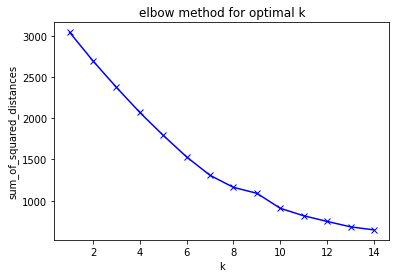

In [137]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [138]:
for i in range(2,15):
  k_means = KMeans(n_clusters=i)
  model = k_means.fit(Clu)
  y_hat = k_means.predict(Clu)
  labels = k_means.labels_
  print(metrics.silhouette_score(Clu, labels, metric = 'euclidean'),metrics.calinski_harabasz_score(Clu, labels))

0.6006319445116457 24.802264002420184
0.5135556417647703 28.998624033334295
0.23877121735424597 32.2283277581339
0.23199302688530482 31.873821587278762
0.2370228333750905 39.1461674384916
0.28253042644315945 42.37254685091112
0.3180709886355346 44.33751521339036
0.3348426280741896 50.2664357971446
0.36996077103491853 50.52619487980213
0.37331009232026213 52.352173928938086
0.37461549270360606 52.439324298002845
0.3858441299797618 54.74090148751178
0.37377355516483624 56.981518634431104


In [139]:
k_means_7 = KMeans(n_clusters=7)
model = k_means_7.fit(Clu)
y_hat_7 = k_means_7.predict(Clu)
labels_7 = k_means_7.labels_
print(metrics.silhouette_score(Clu, labels_7, metric = 'euclidean'))
print(metrics.calinski_harabasz_score(Clu, labels_7))

0.2932208238408379
43.40551813067263
